In [1]:
from lcg import LCG
from scipy.stats import kstest
import random
import matplotlib.pyplot as plt
import pandas as pd


multiplier = 1664525
increment = 1013904223
modulus = 2**32
seed = 1
count = 10

lcg = LCG(multiplier, increment, modulus, seed)

numbers = lcg.generate_numbers(count)
print("Raw pseudorandom numbers:")
print(numbers)


Raw pseudorandom numbers:
[1015568748, 1586005467, 2165703038, 3027450565, 217083232, 1587069247, 3327581586, 2388811721, 70837908, 2745540835]


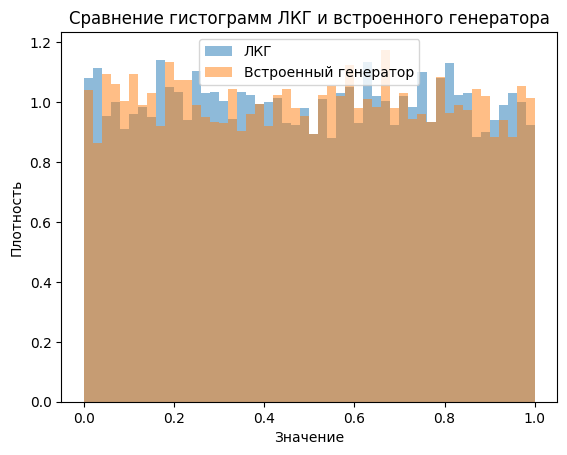

In [2]:

multiplier = 1664525
increment = 1013904223
modulus = 2**32
seed = 1
sample_size = 10000  # Размер выборки

# Создание экземпляра ЛКГ
lcg = LCG(multiplier, increment, modulus, seed)
# Генерация чисел с помощью ЛКГ
lcg_numbers = lcg.generate_numbers_normalized(sample_size)

# Генерация чисел с помощью встроенного генератора
random_numbers = [random.uniform(0, 1) for _ in range(sample_size)]


# Построение гистограмм
plt.hist(lcg_numbers, bins=50, density=True, alpha=0.5, label='ЛКГ')
plt.hist(random_numbers, bins=50, density=True, alpha=0.5, label='Встроенный генератор')
plt.legend()
plt.title('Сравнение гистограмм ЛКГ и встроенного генератора')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.show()



In [3]:


# Тест Колмогорова-Смирнова для ЛКГ
ks_stat_lcg, p_value_lcg = kstest(lcg_numbers, 'uniform')
print(f"ЛКГ KS Статистика: {ks_stat_lcg:.5f}, p-value: {p_value_lcg:.5f}")

# Тест Колмогорова-Смирнова для встроенного генератора
ks_stat_builtin, p_value_builtin = kstest(random_numbers, 'uniform')
print(f"Встроенный генератор KS Статистика: {ks_stat_builtin:.5f}, p-value: {p_value_builtin:.5f}")


ЛКГ KS Статистика: 0.00787, p-value: 0.56199
Встроенный генератор KS Статистика: 0.00819, p-value: 0.51113


In [4]:

# Автокорреляция для ЛКГ
lcg_series = pd.Series(lcg_numbers)
autocorr_lcg = lcg_series.autocorr(lag=1)
print(f"Автокорреляция ЛКГ (lag=1): {autocorr_lcg:.5f}")

# Автокорреляция для встроенного генератора
random_series = pd.Series(random_numbers)
autocorr_builtin = random_series.autocorr(lag=1)
print(f"Автокорреляция встроенного генератора (lag=1): {autocorr_builtin:.5f}")


Автокорреляция ЛКГ (lag=1): 0.00441
Автокорреляция встроенного генератора (lag=1): -0.00392
